## Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

<hr>

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<hr>

## Data Reading/Data Understanding → Defining the path for train and test images 

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

# Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

<hr>

### Create a dataset

Define some parameters for the loader:

## Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width), 
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


<hr>

### Visualize the data
#### → Create a code to visualize one instance of all the nine classes present in the dataset

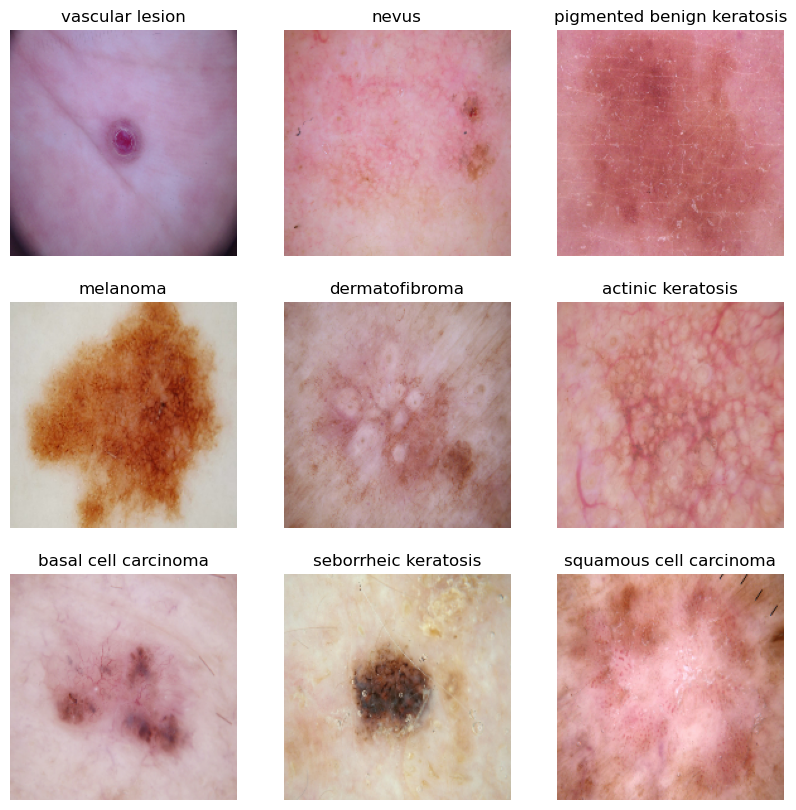

In [9]:
import matplotlib.pyplot as plt
l=[]  # null list is created which is populated in the below for loop
j=0
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        while (int(labels[i]) not in l): #This is given to make sure that labels are not repeated 
            l.append(int(labels[i])) #populating l with the label numbers from 0 to 8
            #print(l)
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            j=j+1



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<br>
<hr>
<br>

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

## Compile the model
### → Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        4

## Train the model
### → Train the model for 20 epochs

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20



C:\Users\User\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



56/56 [==============================] - 7s 68ms/step - loss: 1.9498 - accuracy: 0.2567 - val_loss: 1.8154 - val_accuracy: 0.3400
Epoch 2/20
56/56 [==============================] - 3s 52ms/step - loss: 1.7304 - accuracy: 0.3638 - val_loss: 1.6863 - val_accuracy: 0.4094
Epoch 3/20
56/56 [==============================] - 3s 51ms/step - loss: 1.6463 - accuracy: 0.3979 - val_loss: 1.5927 - val_accuracy: 0.4318
Epoch 4/20
56/56 [==============================] - 3s 51ms/step - loss: 1.5800 - accuracy: 0.4308 - val_loss: 1.5945 - val_accuracy: 0.4139
Epoch 5/20
56/56 [==============================] - 3s 51ms/step - loss: 1.5801 - accuracy: 0.4325 - val_loss: 1.5159 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 3s 52ms/step - loss: 1.4827 - accuracy: 0.4704 - val_loss: 1.4981 - val_accuracy: 0.4698
Epoch 7/20
56/56 [==============================] - 3s 55ms/step - loss: 1.4372 - accuracy: 0.4994 - val_loss: 1.5031 - val_accuracy: 0.4631
Epoch 8/20
56/56 [=====

### Visualizing training results

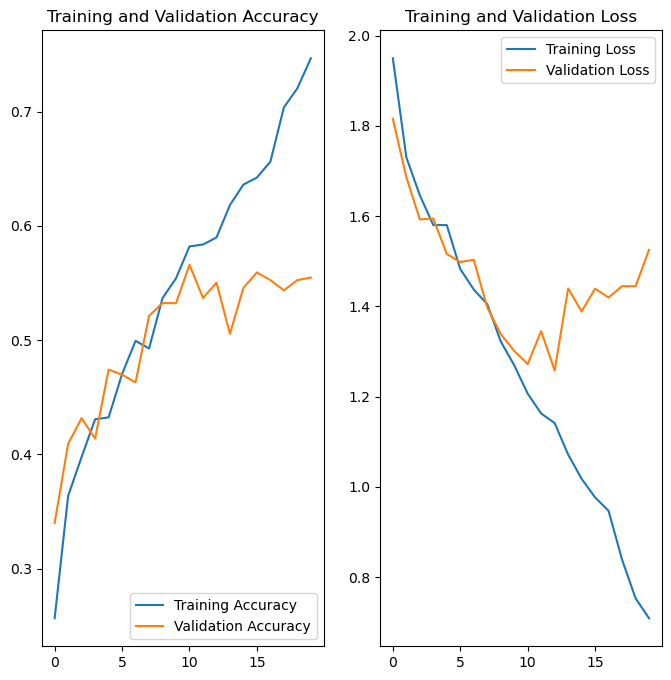

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### The models are severely overfitted with training accuracy very high and validation accuracy very low 

<br>
<hr>
<br>

### Strategy for Data Augmentation

### Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

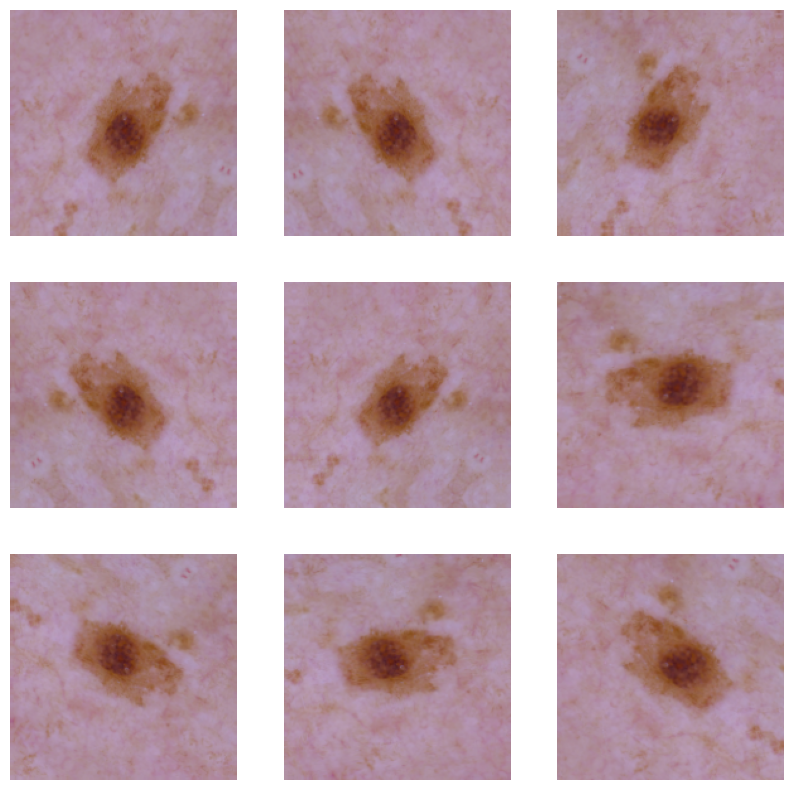

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images,labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model_aug_drop = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),  
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [19]:
model_aug_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model
#### Train the model for 20 epochs

In [20]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model_aug_drop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 87ms/step - loss: 2.0490 - accuracy: 0.2160 - val_loss: 1.9630 - val_accuracy: 0.2841
Epoch 2/20
56/56 [==============================] - 5s 85ms/step - loss: 1.9597 - accuracy: 0.2528 - val_loss: 1.9346 - val_accuracy: 0.2685
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 1.9067 - accuracy: 0.2684 - val_loss: 1.9267 - val_accuracy: 0.2394
Epoch 4/20
56/56 [==============================] - 5s 84ms/step - loss: 1.8702 - accuracy: 0.2924 - val_loss: 1.8443 - val_accuracy: 0.3043
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 1.8107 - accuracy: 0.3359 - val_loss: 1.7319 - val_accuracy: 0.3557
Epoch 6/20
56/56 [==============================] - 5s 84ms/step - loss: 1.7495 - accuracy: 0.3633 - val_loss: 1.6273 - val_accuracy: 0.4004
Epoch 7/20
56/56 [==============================] - 5s 85ms/step - loss: 1.7813 - accuracy: 0.3477 - val_loss: 1.7281 - val_accuracy: 0.3803
Epoch 8/20
56

### Visualizing the results

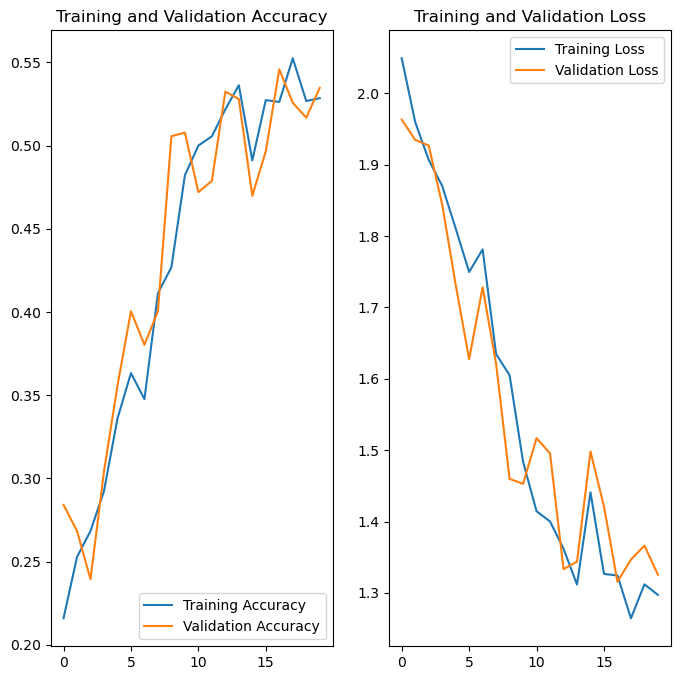

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After augmentation and dropout, the model fitting has improved tremendously. It no longer overfits. Though the accruacy is still around 60 and 55 for training and test set. 

This might be due to lower number of training data available 

<br>
<hr>
<br>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
dic ={'Cancer_type':[],'Data_available':[]}

for name in class_names:
    a = name+'/*'
    n = len(list(data_dir_train.glob(a)))
    dic['Cancer_type'].append(name)
    dic['Data_available'].append(n)
cancer = pd.DataFrame.from_dict(dic)
cancer.sort_values(by='Data_available',ascending=False)

,Cancer_type,Data_available
5,pigmented benign keratosis,462
3,melanoma,438
1,basal cell carcinoma,376
4,nevus,357
7,squamous cell carcinoma,181
8,vascular lesion,139
0,actinic keratosis,114
2,dermatofibroma,95
6,seborrheic keratosis,77


<BarContainer object of 9 artists>

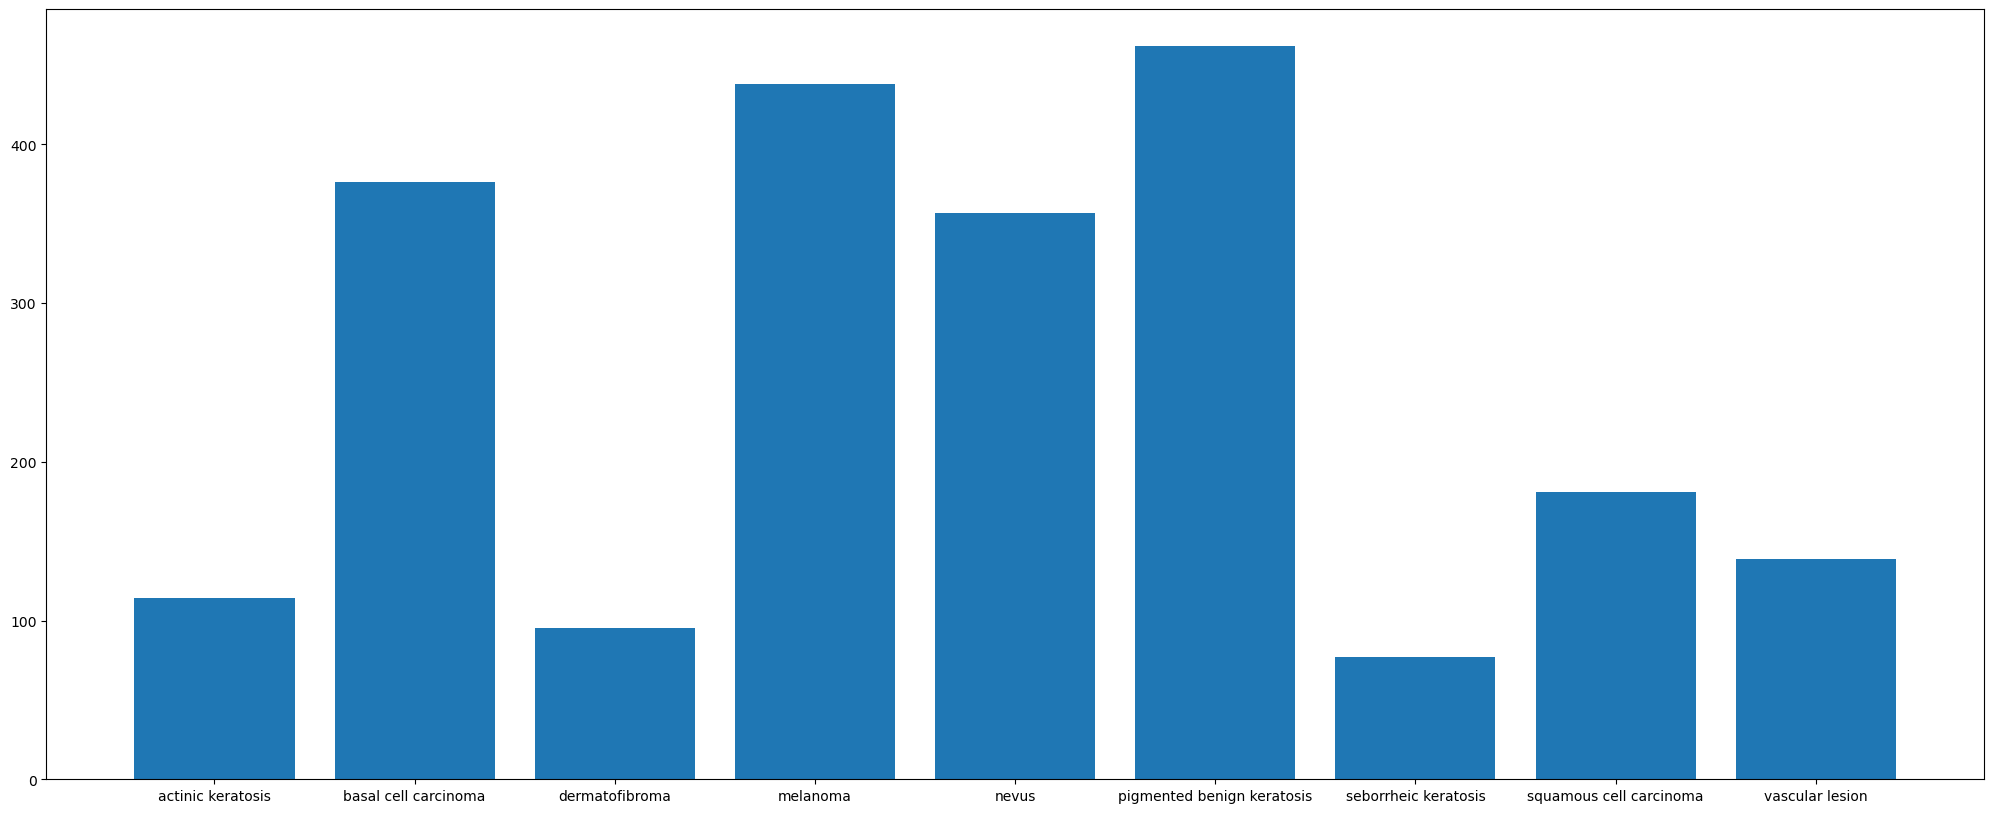

In [23]:
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset="C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'\\'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D73E6070D0>: 100%|█| 500/500 [00:02<00:00, 202.71 Samples


Initialised with 376 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D73E5EC510>: 100%|█| 500/500 [00:02<00:00, 215.00 Samples


Initialised with 95 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D73DB64390>: 100%|█| 500/500 [00:02<00:00, 197.04 Samples


Initialised with 438 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D743F56490>: 100%|█| 500/500 [00:12<00:00, 40.22 Samples


Initialised with 357 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x1D73E1B0110>: 100%|█| 500/500 [00:10<00:00, 48.46 Sample


Initialised with 462 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D743F384D0>: 100%|█| 500/500 [00:02<00:


Initialised with 77 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D743EEF150>: 100%|█| 500/500 [00:05<00:00, 90.62 Samples


Initialised with 181 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D73E640350>: 100%|█| 500/500 [00:02<00:00, 208.85 Samples


Initialised with 139 image(s) found.
Output directory set to C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D73E647050>: 100%|█| 500/500 [00:02<00:00, 207.72 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:
import glob

In [27]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\User\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2b6fe7a8-9761-4482-b3da-b9de7764dcd8.jpg',
 'C:\\Users\\User\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_557c6e63-f0ff-4c14-a974-b8d7e8c09eda.jpg',
 'C:\\Users\\User\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5a0b8daf-0aad-4566-b632-0b49471ff631.jpg',
 'C:\\Users\\User\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_651198c6-e7a5-4bc4-8250-22ade5bb4a26.jpg',
 'C:\\Users\\User\\Downloads\\CNN_assignment\\Skin cancer ISIC The International

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [29]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df_x = pd.DataFrame(df2['Label'].value_counts().reset_index().rename(columns={"index": "Cancer_type", "Label": "Data_available"}))
new_df = df_x+cancer

In [31]:
# New data frame with old and appended values 
new_df

,Cancer_type,Data_available
0,actinic keratosisactinic keratosis,614
1,basal cell carcinomabasal cell carcinoma,876
2,dermatofibromadermatofibroma,595
3,melanomamelanoma,938
4,nevusnevus,857
5,pigmented benign keratosispigmented benign ker...,962
6,seborrheic keratosisseborrheic keratosis,577
7,squamous cell carcinomasquamous cell carcinoma,681
8,vascular lesionvascular lesion,639


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [33]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [34]:
data_dir_train="C:/Users/User/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
model_aug_drop = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
model_aug_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model
Train the model for 30 epochs

In [38]:
epochs = 30

history = model_aug_drop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 22s 121ms/step - loss: 2.0601 - accuracy: 0.2049 - val_loss: 1.9968 - val_accuracy: 0.2101
Epoch 2/30
169/169 [==============================] - 18s 106ms/step - loss: 1.7908 - accuracy: 0.3036 - val_loss: 1.6250 - val_accuracy: 0.3898
Epoch 3/30
169/169 [==============================] - 18s 106ms/step - loss: 1.5935 - accuracy: 0.3937 - val_loss: 1.5689 - val_accuracy: 0.3942
Epoch 4/30
169/169 [==============================] - 18s 106ms/step - loss: 1.5079 - accuracy: 0.4162 - val_loss: 1.4528 - val_accuracy: 0.4425
Epoch 5/30
169/169 [==============================] - 18s 108ms/step - loss: 1.4185 - accuracy: 0.4429 - val_loss: 1.3152 - val_accuracy: 0.4774
Epoch 6/30
169/169 [==============================] - 18s 107ms/step - loss: 1.3812 - accuracy: 0.4564 - val_loss: 1.3664 - val_accuracy: 0.4618
Epoch 7/30
169/169 [==============================] - 18s 107ms/step - loss: 1.3639 - accuracy: 0.4687 - val_loss: 1.3692 - val_ac

#### **Todo:**  Visualize the model results

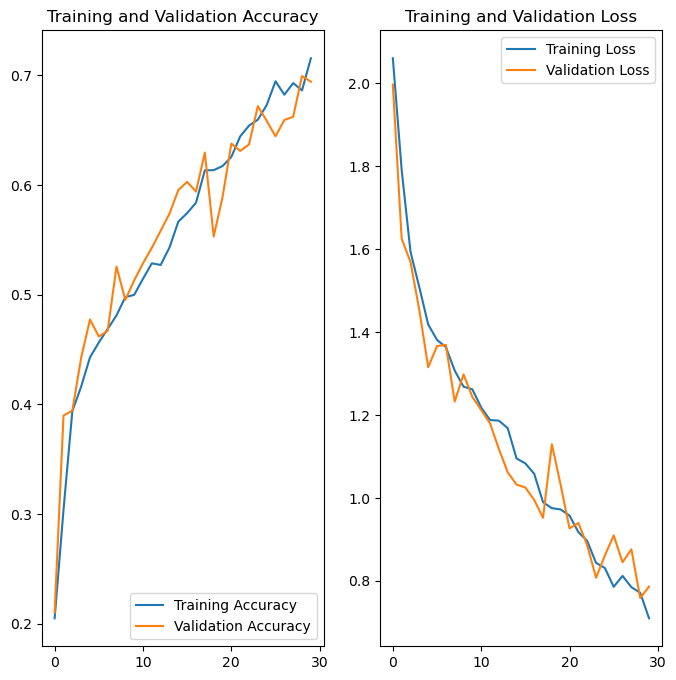

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance has solved the issue of underfitting and has givena fairly better model as compared to that of the previous models 

#### Retrain the model for 50 epochs just in case to check if we get better accuracy or not

In [40]:
model_aug_drop = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [41]:
model_aug_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
epochs = 50

history = model_aug_drop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50
169/169 [==============================] - 19s 103ms/step - loss: 1.8264 - accuracy: 0.3090 - val_loss: 1.5503 - val_accuracy: 0.3898
Epoch 2/50
169/169 [==============================] - 18s 102ms/step - loss: 1.5204 - accuracy: 0.4073 - val_loss: 1.4831 - val_accuracy: 0.3964
Epoch 3/50
169/169 [==============================] - 17s 102ms/step - loss: 1.4646 - accuracy: 0.4308 - val_loss: 1.3941 - val_accuracy: 0.4655
Epoch 4/50
169/169 [==============================] - 18s 103ms/step - loss: 1.3828 - accuracy: 0.4544 - val_loss: 1.2802 - val_accuracy: 0.5019
Epoch 5/50
169/169 [==============================] - 17s 102ms/step - loss: 1.3314 - accuracy: 0.4720 - val_loss: 1.4420 - val_accuracy: 0.4506
Epoch 6/50
169/169 [==============================] - 17s 102ms/step - loss: 1.2698 - accuracy: 0.5111 - val_loss: 1.1973 - val_accuracy: 0.5241
Epoch 7/50
169/169 [==============================] - 18s 103ms/step - loss: 1.2035 - accuracy: 0.5224 - val_loss: 1.3111 - val_ac

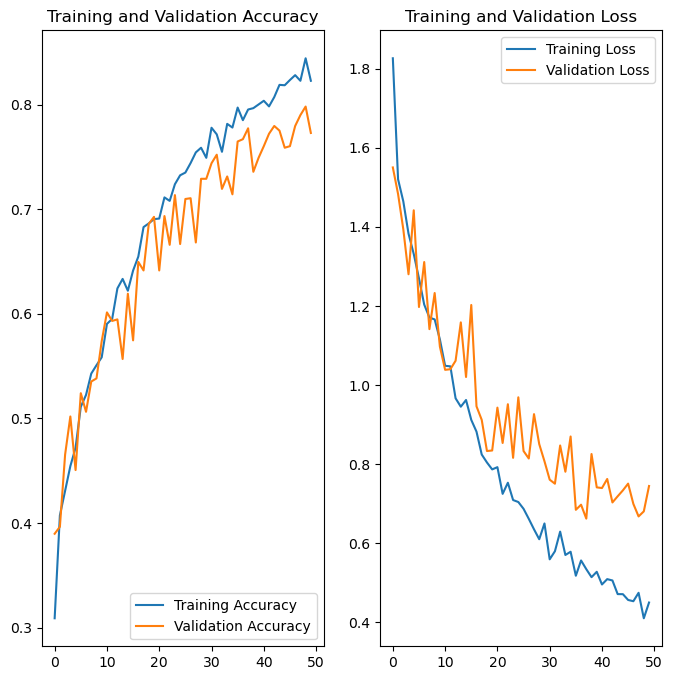

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

* NOTE : Accuracy for 50 epochs is better than 30 epochs. Certainly we received 82% Accuracy with loss around 0.4499 again better than the previous one.